In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

</font> <img src="Banner2.png" width="900" height="250" align="center"/>

</font> <img src="TeamC.png" width="800" height=500 align="center"/>

# <font color=li_blue> Table of contents </font>

# <font color=purple> Sections </font>

* [1.Business Problem](#1)
* [2.Libaries used](#2)
* [3. Setup](#3)
  * [3.1 Start MariaDB](#3.1)
  * [3.2 Start Hadoop](#3.2)  
  * [3.3 Search for Spark Installation](#3.3)
  * [3.4 Create SparkSession](#3.4)
  * [3.5 Data Preparation](#3.5)
      * [3.5.1 Raw DataFrame](#3.5.1)
      * [3.5.2 DataFrame Vertices](#3.5.2)
      * [3.5.3 Countries Dataframe Vertices](#3.5.3)
      * [3.5.4 Countries Flows Dataframe](#3.5.4)
          * [3.5.4.1 Detailed Graph](#3.5.4.1)
      * [3.5.5 Country Aggregated Graph](#3.5.5)

In [79]:
import csv
import pandas as pd
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap,stat_summary,theme_bw
from plotnine import ggplot, aes, geom_bar, coord_flip,labs
from plotnine import *
import numpy as np
import pandas as pd
import plotnine
from plotnine import *
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import math

In [80]:
df = pd.read_csv('madrid_transactions_country.csv', delimiter=';', skiprows=0, low_memory=False)
#df = pd.read_csv('madrid_transactions2.csv')
#df = pd.read_csv('madrid_transactions2.csv', encoding='utf-8',delimiter=',',lineterminator='\n',low_memory=False,skiprows=0)

#df = pd.read_excel('madrid_transactions_country.xls')

In [81]:
df.columns

Index(['Unnamed: 0', 'amount', 'category', 'customer_country', 'daytime',
       'hour', 'tx_date_proc', 'weekday', 'Date_new ', 'numericcode',
       'latitude(average)', 'longitude(average)', 'country_name', 'alpha-3',
       'country_code', 'iso_3166-2', 'region', 'sub_region', 'GDP_USD_2012',
       'GDP per capita (constant 2015 US$)',
       'GDP, PPP (current international $)', 'GDP growth (annual %) ',
       'Income_classification', 'PPP_2012',
       'Gross domestic income (constant LCU)',
       'Adjusted net national income per capita (constant 2015 US$)',
       'GNI per capita, PPP (current international $)'],
      dtype='object')

In [82]:
df.head()

,Unnamed: 0,amount,category,customer_country,daytime,hour,tx_date_proc,weekday,Date_new,numericcode,...,sub_region,GDP_USD_2012,GDP per capita (constant 2015 US$),"GDP, PPP (current international $)",GDP growth (annual %),Income_classification,PPP_2012,Gross domestic income (constant LCU),Adjusted net national income per capita (constant 2015 US$),"GNI per capita, PPP (current international $)"
0,1,33.46,Fashion & Shoes,GB,Night,21,2012-03-01 21:51:54+00,thursday,01.03.12 21:51,826,...,Northern Europe,2719158341006,43100,2.453352e+12,1.469888,High income,0.70,1769649482466,35265,38120
1,2,59.97,Fashion & Shoes,GB,Afternoon,16,2012-03-02 16:12:52+00,friday,02.03.12 16:12,826,...,Northern Europe,2719158341006,43100,2.453352e+12,1.469888,High income,0.70,1769649482466,35265,38120
2,3,49.99,Fashion & Shoes,CN,Evening,17,2012-03-02 17:34:01+00,friday,02.03.12 17:34,156,...,Eastern Asia,8532229986994,6592,1.512454e+13,7.863736,Upper middle income,3.56,..,4997,11140
3,4,5.95,Fashion & Shoes,GB,Evening,17,2012-03-01 17:43:29+00,thursday,01.03.12 17:43,826,...,Northern Europe,2719158341006,43100,2.453352e+12,1.469888,High income,0.70,1769649482466,35265,38120
4,5,16.65,Bars & restaurants,DK,Night,22,2012-03-01 22:47:52+00,thursday,01.03.12 22:47,208,...,Northern Europe,327148943812,51567,2.505246e+11,0.226500,High income,7.56,1909813185266,42430,45820


In [83]:
df.describe()

,Unnamed: 0,amount,hour,latitude(average),longitude(average),country_code,GDP_USD_2012,GDP per capita (constant 2015 US$),"GDP, PPP (current international $)",GDP growth (annual %),"GNI per capita, PPP (current international $)"
count,10793.000000,10793.000000,10793.000000,10781.000000,10782.000000,10793.000000,1.079300e+04,10793.000000,1.070600e+04,10793.000000,10793.000000
mean,5397.000000,108.735644,15.032428,36.377767,-2.871369,480.415084,4.066684e+12,34111.388770,4.411083e+12,1.678976,35716.519040
std,3115.815062,310.303331,4.809074,23.721422,67.542173,285.287340,5.548015e+12,19608.625647,5.871824e+12,2.622192,16638.373106
min,1.000000,0.040000,0.000000,-41.000000,-172.333300,0.000000,7.605496e+08,362.000000,0.000000e+00,-7.086697,0.000000
25%,2699.000000,19.900000,12.000000,35.000000,-64.000000,250.000000,4.985236e+11,12986.000000,4.697206e+11,0.313135,20620.000000
50%,5397.000000,39.990000,16.000000,42.500000,2.000000,410.000000,2.086958e+12,36183.000000,2.172384e+12,1.762223,38500.000000
75%,8095.000000,92.680000,18.000000,52.500000,25.000000,818.000000,2.719158e+12,48886.000000,3.480299e+12,2.402531,46500.000000
max,10793.000000,15000.000000,23.000000,65.000000,174.000000,882.000000,1.625397e+13,104488.000000,1.625397e+13,16.665429,132440.000000


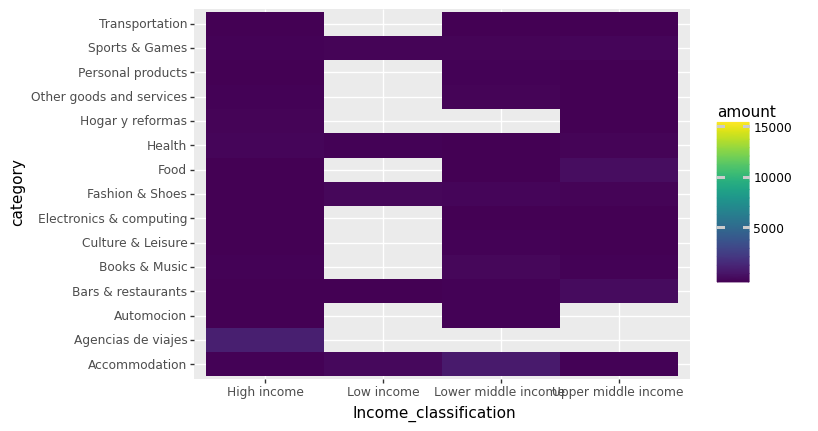

<ggplot: (8768829248979)>

In [84]:
# Heatmap 
ggplot(df, aes( "Income_classification","category", fill= "amount")) + \
geom_tile() 
#+ plotnine.theme(axis_text_x = plotnine.element_text(angle=90))

In [85]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z= df["amount"],
                   x=df['Income_classification'],
                   y=df["category"],
                   hoverongaps = False))
fig.show()

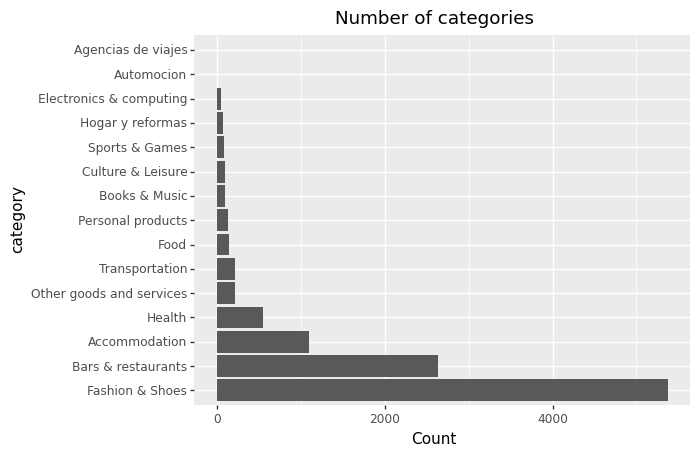

<ggplot: (8768829254163)>

In [86]:
# Determine order and create a categorical type
# Note that value_counts() is already sorted
cat_list = df['category'].value_counts().index.tolist()
df_cat = pd.Categorical(df['category'], categories=cat_list)

# assign to a new column in the DataFrame
df2 = df.assign(df_cat = df_cat)

(ggplot(df2)
 + aes(x='df_cat')
 + geom_bar(size=20)
 + coord_flip()
 + labs(y='Count', x='category', title='Number of categories')
)

In [87]:
df1 =df.groupby(['country_name', 'category','Income_classification'],as_index=False).agg(
    # Get max of the duration column for each group
    mean_amount=('amount','mean'),
    # Get min of the duration column for each group
    sum_amount=('amount', sum),
    # Get sum of the duration column for each group
    count_amount=('amount', 'count'),
    # Apply mean of growth(should give the real growth)
    growth_GDP=('GDP growth (annual %) ', 'mean'),
)

In [88]:
df1

,country_name,category,Income_classification,mean_amount,sum_amount,count_amount,growth_GDP
0,Algeria,Fashion & Shoes,Upper middle income,197.095000,1182.57,6,3.400000
1,Algeria,Health,Upper middle income,216.620000,216.62,1,3.400000
2,Andorra,Accommodation,High income,130.350000,521.40,4,-4.974444
3,Andorra,Automocion,High income,390.120000,390.12,1,-4.974444
4,Andorra,Bars & restaurants,High income,57.456316,2183.34,38,-4.974444
...,...,...,...,...,...,...,...
612,Venezuela (Bolivarian Republic of),Personal products,Upper middle income,9.750000,19.50,2,5.625957
613,Venezuela (Bolivarian Republic of),Sports & Games,Upper middle income,74.000000,74.00,1,5.625957
614,Viet Nam,Fashion & Shoes,Lower middle income,648.525000,1297.05,2,5.500000
615,Viet Nam,Health,Lower middle income,206.400000,206.40,1,5.500000


In [89]:
df1 = df1.merge(sales, left_on='category', right_on ='category', how = 'left')

In [90]:
df3 =df.groupby(['category'],as_index=False).agg(
    # Get max of the duration column for each group
    mean_amount=('amount','mean'),
    # Get min of the duration column for each group
    sum_amount=('amount', sum),
    # Get sum of the duration column for each group
    count_amount=('amount', 'count'),
)

In [91]:
df3

,category,mean_amount,sum_amount,count_amount
0,Accommodation,256.362350,282511.31,1102
1,Agencias de viajes,303.284000,1516.42,5
2,Automocion,302.533333,1815.20,6
3,Bars & restaurants,76.551744,201943.50,2638
4,Books & Music,226.359892,21051.47,93
5,Culture & Leisure,258.122609,23747.28,92
6,Electronics & computing,46.234314,2357.95,51
7,Fashion & Shoes,91.998047,494213.51,5372
8,Food,91.228690,13228.16,145
9,Health,48.414117,26579.35,549


In [92]:
import plotly.express as px
import pandas as pd

fig = px.line_polar(df3, r='mean_amount', theta='category', line_close=True)
fig.update_traces(fill='toself')
fig.show()

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [105]:
total = df3.drop(columns =['count_amount'])

In [108]:
total.rename(columns = {'mean_amount':'total_mean_amount'}, inplace = True)
total.rename(columns = {'sum_amount':'sum_mean_amount'}, inplace = True)
total

,category,total_mean_amount,sum_mean_amount
0,Accommodation,256.362350,282511.31
1,Agencias de viajes,303.284000,1516.42
2,Automocion,302.533333,1815.20
3,Bars & restaurants,76.551744,201943.50
4,Books & Music,226.359892,21051.47
5,Culture & Leisure,258.122609,23747.28
6,Electronics & computing,46.234314,2357.95
7,Fashion & Shoes,91.998047,494213.51
8,Food,91.228690,13228.16
9,Health,48.414117,26579.35


In [117]:
df4 =df.groupby(['country_name', 'category'],as_index=False).agg(
    # Get max of the duration column for each group
    mean_amount=('amount','mean'),
)

In [118]:
US_sales = df4[df4["country_name"].str.contains('United States of America')]
US_sales.rename(columns = {'mean_amount':'US_mean_amount'}, inplace = True)
FR_sales = df4[df4["country_name"].str.match('France')]
FR_sales.rename(columns = {'mean_amount':'FR_mean_amount'}, inplace = True)
CN_sales = df4[df4["country_name"].str.match('China')]
CN_sales.rename(columns = {'mean_amount':'CN_mean_amount'}, inplace = True)
#US_sales = df1.groupby('category').filter(lambda x: (x["country_name"] == ['United States of America']).any())
#FR_sales = df1.groupby(['France'])['sum_amount'].sum().reset_index()
#CH_sales = df1.groupby(['China'])['sum_amount'].sum().reset_index()

/var/folders/ks/5bc1x9p158vgc4774v7r2tq40000gn/T/ipykernel_61619/996694133.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ks/5bc1x9p158vgc4774v7r2tq40000gn/T/ipykernel_61619/996694133.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ks/5bc1x9p158vgc4774v7r2tq40000gn/T/ipykernel_61619/996694133.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
US_sales 

,country_name,category,US_mean_amount
584,United States of America,Accommodation,258.664463
585,United States of America,Bars & restaurants,54.644318
586,United States of America,Books & Music,202.911667
587,United States of America,Culture & Leisure,565.555000
588,United States of America,Electronics & computing,22.375000
589,United States of America,Fashion & Shoes,59.601379
590,United States of America,Food,58.504000
591,United States of America,Health,29.070345
592,United States of America,Hogar y reformas,47.510833
593,United States of America,Other goods and services,53.200000


In [120]:
US_FR = US_sales.merge(FR_sales, left_on='category', right_on ='category', how = 'left')
US_FR = US_FR.merge(CN_sales,left_on='category', right_on ='category', how = 'left')
US_FR = US_FR.merge(total,left_on='category', right_on ='category', how = 'left')
US_FR = US_FR.fillna(0)

In [121]:
US_FR

,country_name_x,category,US_mean_amount,country_name_y,FR_mean_amount,country_name,CN_mean_amount,total_mean_amount,sum_mean_amount
0,United States of America,Accommodation,258.664463,France,215.760114,China,433.425484,256.362350,282511.31
1,United States of America,Bars & restaurants,54.644318,France,49.686941,China,178.751475,76.551744,201943.50
2,United States of America,Books & Music,202.911667,France,41.713333,0,0.000000,226.359892,21051.47
3,United States of America,Culture & Leisure,565.555000,France,32.966667,China,4.000000,258.122609,23747.28
4,United States of America,Electronics & computing,22.375000,France,58.230000,0,0.000000,46.234314,2357.95
5,United States of America,Fashion & Shoes,59.601379,France,50.868313,China,250.171860,91.998047,494213.51
6,United States of America,Food,58.504000,France,24.535000,China,170.183333,91.228690,13228.16
7,United States of America,Health,29.070345,France,58.148500,China,101.095000,48.414117,26579.35
8,United States of America,Hogar y reformas,47.510833,France,72.817143,China,13.980000,58.872625,4709.81
9,United States of America,Other goods and services,53.200000,France,112.642955,China,254.250000,131.987964,29169.34


In [122]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=US_FR['US_mean_amount'],
      theta=US_FR['category'],
      fill='toself',
      name='USA'
))

fig.add_trace(go.Scatterpolar(
      r=US_FR['CN_mean_amount'],
      theta=US_FR['category'],
      fill='toself',
      name='China'
))

fig.add_trace(go.Scatterpolar(
      r=US_FR['total_mean_amount'],
      theta=US_FR['category'],
      fill='toself',
      name='Total'
))

fig.show()

In [ ]:
df1 = df1.merge(sales, left_on='category', right_on ='category', how = 'left')

In [ ]:
df1

In [ ]:
df1['market_share_ctry'] = (df1['sum_amount_x']/df1['sum_amount_y'])

In [ ]:
df1

In [ ]:
#df1[df1.category == ('Health')]
df1.columns

New column for country classification only 

In [ ]:
#max market share to calculate the relative market share, metric that shows a countries position in the market compared to its main competitor.
df1['max_ms'] = df1.groupby(['category'])['market_share_ctry'].transform(max)
df1['relative_MS'] = (df1['market_share_ctry']/df1['max_ms'])

In [ ]:
df1

In [ ]:
df2 = df.groupby(['country_name','Income_classification'],as_index=False).agg(
    # Get mean amount per column for each country
    mean_amount=('amount', 'mean'),
    # Get sum amount per column for each country
    sum_amount=('amount', sum),
    #  Get count amount per column for each country
    count_amount=('amount', 'count'),
    #  Get median amount per column for each country
    median_amount=('amount', 'median'),
    # Apply mean of growth since it is the same for each line by country (should give the real growth)
    growth_GDP=('GDP growth (annual %) ', 'mean'),
    # Apply mean of GDP per capita since it is the same for each line (should give the real growth)
    GDP_per_capita = ('GDP per capita (constant 2015 US$)','mean'),
)

In [ ]:
df2['log_mean_amount'] = np.log(df2['mean_amount'])

In [ ]:
sales = df2['sum_amount'].sum()

In [ ]:
sales

In [ ]:
df2['percent'] = (df2['sum_amount'] / sales) *100
df2['log_sum_amount'] = np.log(df2['sum_amount'])
df2['log_GDP_per_capita'] = (df2['GDP_per_capita'] / sales) *100

In [ ]:
df2

In [ ]:
df2.describe()

In [ ]:
df2.columns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
#Heatmap - Checking for autocorrelation among variables 
matrix = df2.corr()
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(50,20))
heatmap = sns.heatmap(matrix, center=0, fmt=".3f", square=True, annot=True, linewidth=1.3, mask = mask,vmax=0.9);
plt.show()

In [ ]:
ggplot(df2, aes(x='percent', y='growth_GDP', size ='count_amount')) + \
    geom_point(alpha=0.7) +\
    scale_size(range = (1.4, 19), name="Population (M)") 

In [ ]:
data = px.scatter(df2, x="percent", y='growth_GDP',size='count_amount', color='Income_classification', hover_name='country_name',
                  size_max=20)

layout = go.Layout(
    title='Growth-Share Matrix of countries Madrid transactions',
    xaxis=dict(
        title='Market Share of Purchases, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='GDP Growth, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(0,0,0,0)',
    plot_bgcolor='rgb(0,0,0,0)',
)

fig = go.Figure(data=data, layout=layout)

fig = fig.update_layout(
    yaxis_range=[-10,10], 
    title='BCG Matrix Countries Growth vs Market Share',
    yaxis=dict(title='GDP Growth, 2012 [%]'))    
fig.update_layout(
    xaxis_range=[-0,16],
    xaxis=dict(title='Market Share of Purchases, 2012 [%]'))

fig.update_layout(template="simple_white")
fig.add_hline(y=0,line_width=2, line_dash="dash", line_color="black")
fig.add_vline(x=8, line_width=2, line_dash="dash", line_color="black")

fig.add_annotation(
    x=4
    , y=9
    , text='Question Mark'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)
fig.add_annotation(
    x=12
    , y=9
    , text='Stars'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=12
    , y=-9
    , text='Cash Cows'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=4
    , y=-9
    , text='Dogs'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

In [ ]:
data = px.scatter(df2, x="log_sum_amount", y='log_GDP_per_capita',size='mean_amount',trendline="ols", hover_name='country_name',
                  size_max=20)

layout = go.Layout(
    title='Growth-Share Matrix of countries Madrid transactions',
    xaxis=dict(
        title='median_amount, 2012 ',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='GDP per Capity, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(0,0,0,0)',
    plot_bgcolor='rgb(0,0,0,0)',
)

fig = go.Figure(data=data, layout=layout)

fig = fig.update_layout(
    yaxis_range=[-0,10], 
    title='BCG Matrix Capita vs median',
    yaxis=dict(title='log_GDP per capita, 2012 [%]'))    
fig.update_layout(
    xaxis_range=[-0,12],
    xaxis=dict(title='log_amount, 2012 [%]'))

fig.update_layout(template="simple_white")
fig.add_hline(y=60000,line_width=2, line_dash="dash", line_color="black")
fig.add_vline(x=8, line_width=2, line_dash="dash", line_color="black")

fig.add_annotation(
    x=4
    , y=9
    , text='Question Mark'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)
fig.add_annotation(
    x=12
    , y=9
    , text='Stars'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=12
    , y=-9
    , text='Cash Cows'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=4
    , y=-9
    , text='Dogs'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

In [ ]:
df1.category

In [ ]:
data = px.scatter(df1, x='relative_MS', y='growth_GDP', color='category',size='sum_amount_x', hover_name='country_name',
                  size_max=20)

layout = go.Layout(
    title='Growth-Share Matrix of countries Madrid transactions',
    xaxis=dict(
        title='Market Share of Purchases, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='GDP per Capity, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(0,0,0,0)',
    plot_bgcolor='rgb(0,0,0,0)',
)

fig = go.Figure(data=data, layout=layout)

fig = fig.update_layout(
    yaxis_range=[-10,10], 
    title='BCG Matrix Countries Growth vs Market Share',
    yaxis=dict(title='GDP growth, 2012 [%]'))    
fig.update_layout(
    xaxis_range=[0,1.05],
    xaxis=dict(title='Relative MS by category, 2012 [%]'))

fig.update_layout(template="simple_white")
fig.add_hline(y=0,line_width=2, line_dash="dash", line_color="black")
fig.add_vline(x=0.5, line_width=2, line_dash="dash", line_color="black")

fig.add_annotation(
    x=0.25
    , y=9
    , text='Question Mark'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)
fig.add_annotation(
    x=0.75
    , y=9
    , text='Stars'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=0.75
    , y=-9
    , text='Cash Cows'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=0.25
    , y=-9
    , text='Dogs'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

In [ ]:
import plotly.graph_objects as go

import pandas as pd

# Load dataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
df.columns = [col.replace("AAPL.", "") for col in df.columns]

# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.High),
               name="High",
               line=dict(color="#33CFA5")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.High.mean()] * len(df.index),
               name="High Average",
               visible=False,
               line=dict(color="#33CFA5", dash="dash")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.Low),
               name="Low",
               line=dict(color="#F06A6A")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.Low.mean()] * len(df.index),
               name="Low Average",
               visible=False,
               line=dict(color="#F06A6A", dash="dash")))

# Add Annotations and Buttons
high_annotations = [dict(x="2016-03-01",
                         y=df.High.mean(),
                         xref="x", yref="y",
                         text="High Average:<br> %.3f" % df.High.mean(),
                         ax=0, ay=-40),
                    dict(x=df.High.idxmax(),
                         y=df.High.max(),
                         xref="x", yref="y",
                         text="High Max:<br> %.3f" % df.High.max(),
                         ax=0, ay=-40)]
low_annotations = [dict(x="2015-05-01",
                        y=df.Low.mean(),
                        xref="x", yref="y",
                        text="Low Average:<br> %.3f" % df.Low.mean(),
                        ax=0, ay=40),
                   dict(x=df.High.idxmin(),
                        y=df.Low.min(),
                        xref="x", yref="y",
                        text="Low Min:<br> %.3f" % df.Low.min(),
                        ax=0, ay=40)]

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="None",
                     method="update",
                     args=[{"visible": [True, False, True, False]},
                           {"title": "Yahoo",
                            "annotations": []}]),
                dict(label="High",
                     method="update",
                     args=[{"visible": [True, True, False, False]},
                           {"title": "Yahoo High",
                            "annotations": high_annotations}]),
                dict(label="Low",
                     method="update",
                     args=[{"visible": [False, False, True, True]},
                           {"title": "Yahoo Low",
                            "annotations": low_annotations}]),
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "Yahoo",
                            "annotations": high_annotations + low_annotations}]),
            ]),
        )
    ])

# Set title
fig.update_layout(title_text="Yahoo")

fig.show()

In [ ]:
import pandas as pd
import os
import plotly.graph_objs as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


# lists of categories
options1 = sorted(df1["category"].unique().tolist())

# dictionary of category - subcategories
all_options = df1.groupby("category")["country_name"].unique()\
                .apply(list).to_dict()

# we add as first subcategory for each category `all`
for k, v in all_options.items():
    all_options[k].insert(0, 'all')


app = dash.Dash()
app.layout = html.Div([
    dcc.Dropdown(
        id='first-dropdown',
        options=[{'label': k, 'value': k} for k in all_options.keys()],
        value=options1[0]
    ),

    html.Hr(),

    dcc.Dropdown(id='second-dropdown'),

    html.Hr(),

    dcc.Graph(id='display-selected-values')
])

# the following two callbacks generate a dynamic 2 option

@app.callback(
    dash.dependencies.Output('second-dropdown', 'options'),
    [dash.dependencies.Input('first-dropdown', 'value')])
def set_2_options(first_option):
    return [{'label': i, 'value': i} for i in all_options[first_option]]


@app.callback(
    dash.dependencies.Output('second-dropdown', 'value'),
    [dash.dependencies.Input('second-dropdown', 'options')])
def set_2_value(available_options):
    return available_options[0]['value']


@app.callback(
    dash.dependencies.Output('display-selected-values', 'figure'),
    [dash.dependencies.Input('first-dropdown', 'value'),
     dash.dependencies.Input('second-dropdown', 'value')])
def update_graph(selected_first, selected_second):
    if selected_second == 'all':
        ddf = df1[df1["category"]==selected_first]
    else:
        ddf = df1[(df1["category"]==selected_first) &
                 (df1["country_name"]==selected_second)]

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(x=ddf["percent"],
                   y=ddf['growth_GDP'],
                   marker = dict(size=15, color='green'),
                   mode='markers'))
    return fig
if __name__ == '__main__':
    app.run_server(debug=True, port=8050)

In [ ]:
df["category"].unique()

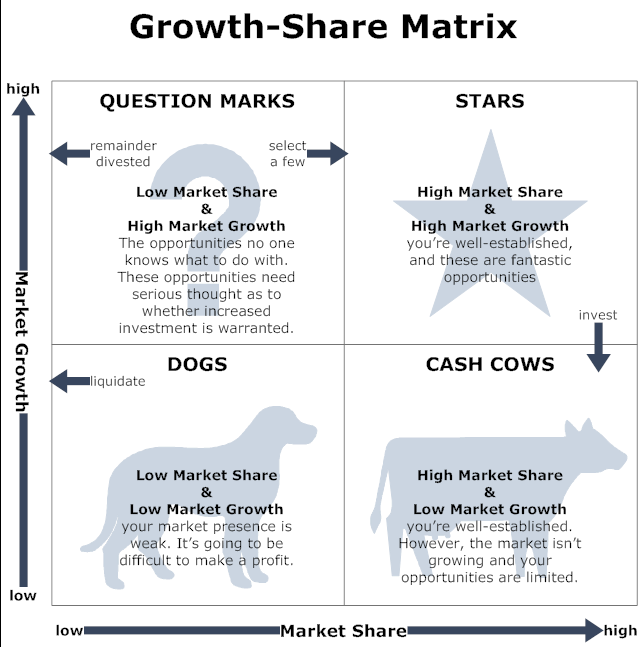

In [ ]:
#pip install chart-studio

In [ ]:
#import chart_studio.plotly as py
from chart_studio import plotly as py
import plotly.graph_objs as go

hover_text = []
color_range = []
for index, row in df2.iterrows():
    hover_text.append(('Percent: {percent}<br>'+
                      'Growth GDP: {growth_GDP}%<br>'+
                      'Count: {count_amount}<br>').format(percent=df2['percent'],
                                                                        growth_GDP=df2['growth_GDP'],
                                                                        count_amount=df2['count_amount']))
    colorscale='Income_classification'

trace0 = go.Scatter(
    x=df2['percent'],
    y=df2['growth_GDP'],
    text=hover_text,
    mode='markers',
    marker=dict(
        size=df2['count_amount'],
        color=color_range,
        showscale=True,
        reversescale=True,
        colorbar=dict(
                title='Income'
            ),
        colorscale='RdBu'
    )
)
                                                                                                    

data = [trace0]
layout = go.Layout(
    title='Growth-Share Matrix of countries Madrid transactions',
    xaxis=dict(
        title='Market Share of Purchases, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='GDP Growth, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bcg-matrix')

In [ ]:
df3 =df.groupby(['category', 'hour'],as_index=False).agg(
    # Get max of the duration column for each group
    mean_amount=('amount', 'mean'),
    # Get min of the duration column for each group
    sum_amount=('amount', sum),
    # Get sum of the duration column for each group
    count_amount=('amount', 'count'),
)

In [ ]:
ggplot(df3,aes(x="hour",y="sum_amount",color="category"))+geom_line()


In [ ]:
custom_dict = {'Dawn': 0,'Morning': 1, 'Mid morning': 2, 'Afternoon': 3,'Evening': 4,'Night': 5,'Midight': 23}

In [ ]:
df.sort_values(by=['daytime'], key=lambda x: x.map(custom_dict))

In [ ]:
import plotnine
plotnine.ggplot(df, plotnine.aes(x='daytime', y='amount')) + \
    plotnine.geom_col(plotnine.aes(fill = 'category')) 
#+ \
    #plotnine.stat_summary(plotnine.aes(label ='stat(y)'), fun_y = sum, geom = "text")
#plotnine.stat_summary(plotnine.aes(label ='stat(y)'), fun_y = sum, geom = "text")

In [ ]:
plotnine.ggplot(df, plotnine.aes(x='daytime', y='amount')) + \
    plotnine.geom_col(plotnine.aes(fill = 'category')) 

In [ ]:
import plotnine
plotnine.ggplot(df, plotnine.aes(x='hour', y='amount')) + \
    plotnine.geom_col(plotnine.aes(fill = 'category')) 

In [ ]:
sum_amount=df.groupby('category').amount.sum()

In [ ]:
(ggplot(df)+ aes(x="amount",y="amount", color='category')
 + geom_point()
 + plotnine.stat_summary(plotnine.aes(label ='stat(y)'), fun_y = sum, geom = "point")
 + labs(title='hour vs amount', x='Sum Amount vs Count Amount', y='sum_amount')
 + theme_bw()
)



In [ ]:
# Libraries

# Create a list of word
text=df['region'].values

# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=1000, margin=0,background_color="white").generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
ggplot(df,aes(x ="category", y ="amount"))+ geom_boxplot(aes(fill = "category")) 
#+ geom_jitter(alpha = 0.4)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Get the categories, sorted alphabetically
species = sorted(df["Income_classification"].unique())

# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [df[df["Income_classification"] == specie]["category"].values for specie in species]

# Create jittered version of "x" (which is only 0, 1, and 2)
# More about this in the bonus track!
jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

In [ ]:
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#1B9E77", "#D95F02", "#7570B3","#2a475e"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [0, 1, 2, 3]

# Horizontal lines
HLINES = [40, 50, 60, 70]

In [ ]:
fig, ax = plt.subplots(figsize= (14, 10))

# Some layout stuff ----------------------------------------------
# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 100, color=color, alpha=0.4)

In [ ]:
import numpy as np
ggplot(df)+ aes(x="hour",y="amount", color='category')+\
geom_point()+\
stat_summary(
    mapping=aes(x="hour", y="amount"),
    fun_y=sum
)

In [ ]:
plotnine.ggplot(df, plotnine.aes(x="hour",y="amount", color='category'))+ \
plotnine.geom_point()+ \
plotnine.stat_summary(plotnine.aes( geom = "text"))

In [ ]:
#labs(title='hour vs amount', x='Engine Displacement, in Litres', y='Highway Miles per Gallon'))

In [ ]:
import plotly.express as px
fig = px.treemap(df, path=[px.Constant("all"), 'Region', 'customer_country'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
import plotly.express as px
fig = px.treemap(df, path=[px.Constant("all"), 'daytime', 'hour'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(df, row="category", hue="category", aspect=4, height=2.00)
# Use map function to make density plot in each element of the grid.
ridge_plot.map(sns.kdeplot, "hour", clip_on=False, shade=True, alpha=0.7, lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=4, clip_on=False)
ridge_plot.savefig("Ridgeline_plot_Seaborn_first_step.png")

In [ ]:
sns.set_theme(style="white")

g = sns.PairGrid(df, vars = ['amount','hour'],hue='category', diag_sharey=False, palette = 'rainbow_r')
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot,warn_singular=False)
g.map_diag(sns.kdeplot, lw=2,warn_singular=False)
g.add_legend()

In [ ]:
label_names = ['category']
df['avg_amount'] = df[['amount','category']].mean()
temp_df = df[['hour', 'amount', 'avg_amount']].copy()
temp_df['category'] = [label_names[i-1] for i in df['category']]

fig = px.scatter_3d(
    temp_df, 
    x='hour', 
    y='amount', 
    z='avg_amount',
    color='category',
    title='Hillshade Features in 3-D',
    opacity=0.2, 
    color_discrete_sequence=px.colors.qualitative.Plotly[:7],
    width=1000, height=800
    )

fig.show()

In [ ]:
#soil_dummies = df.loc[:,df.columns.str.startswith('category')]
#soil = soil_dummies.idxmax(axis=1)
#soil.name = 'category'
#df['category'] 
plt.figure(figsize=(12,5))
sns.countplot(x='category',data=df,palette='rainbow',order = df['category'].value_counts().index);
plt.xticks(rotation=90);

In [ ]:
pip install plydata

In [ ]:
import pandas as pd
import pandas.api.types as pdtypes
import numpy as np

from plotnine import *
from plydata import *

In [ ]:
segment_data = (
    point_data
    >> group_by('country')
    >> summarize(min='min(sm_use_percent)', max='max(sm_use_percent)')
    >> define(gap='max-min')
    >> arrange('-gap')
    # Format the floating point data that will be plotted into strings
    >> define(
        min_str='format_sequence(min, "{:.0f}")',
        max_str='format_sequence(max, "{:.0f}")',
        gap_str='format_sequence(gap, "{:.0f}")',
    )
)

In [ ]:
ggplot(w, aes(x=reorder(factor(area),tfr,FUN="median"), y=tfr)) 
p + geom_violin() + geom_boxplot(width=.1, outlier.size=0) + scale_y_continuous(breaks=c(1,2,3,4,5,6,7)) + theme(axis.title.y=element_text(angle=0,size=12),
axis.text.y=element_text(color="black", size=12), axis.text.x=element_text(color="black", size=12), legend.position="none") +
labs(title="Country TFRs: Density Distribution, Median and IQR by Area, 2012", x="", y="TFR")

Graph processing

In [ ]:
df1 = df[['Assignee', 'Reporter']]